In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('D:/application_train.csv')
test = pd.read_csv('D:/application_test.csv')

In [3]:
label = train['TARGET']
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = train, labels = label)

In [5]:
fs.identify_missing(missing_threshold = 0.6)

17 features with greater than 0.60 missing values.



In [8]:
#查看缺失值的分数（缺失数据所占比例）
fs.missing_stats.head()

,missing_fraction
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330


In [13]:
#查看哪些特征会被删除
missing_features = fs.ops['missing']
missing_features[:5]

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG']

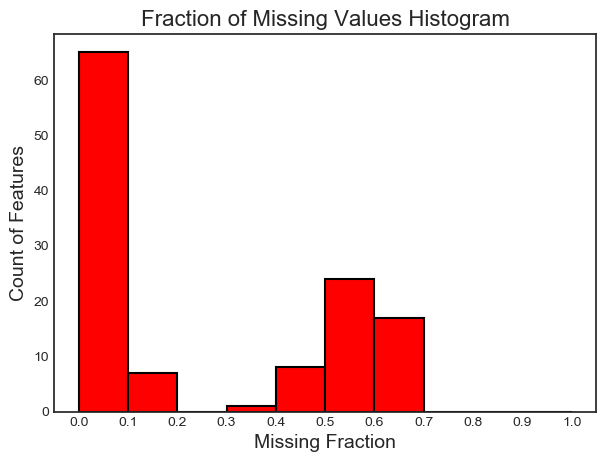

In [14]:
#查看各特征缺失值情况
fs.plot_missing()

In [15]:
fs.identify_collinear(correlation_threshold = 0.98)

20 features with a correlation magnitude greater than 0.98.



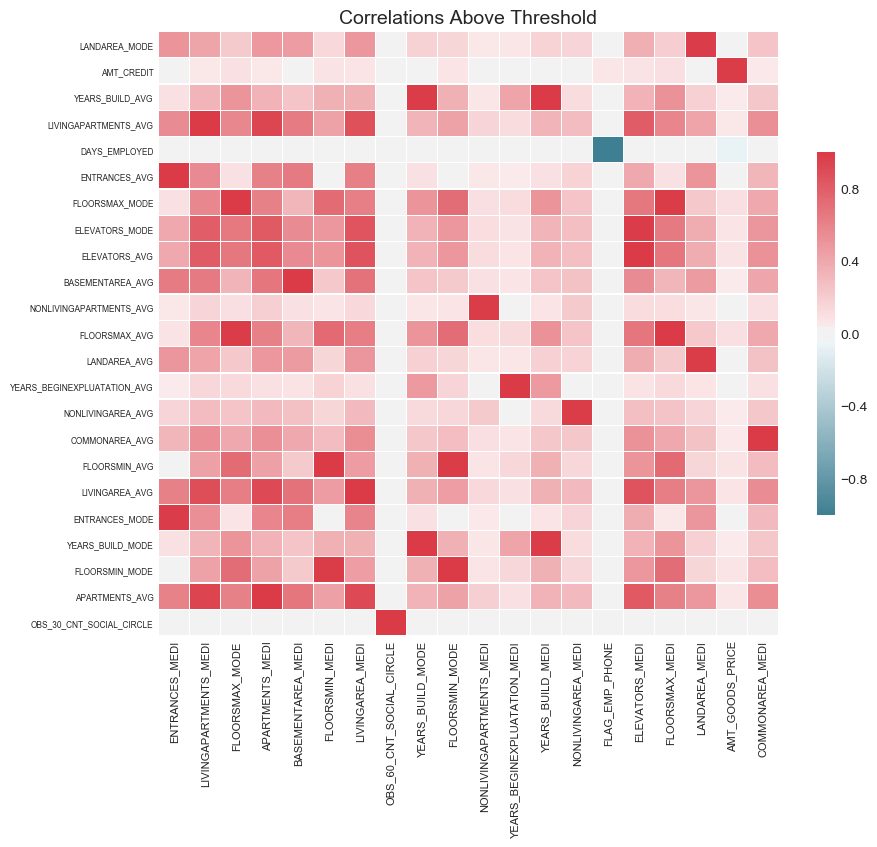

In [20]:
fs.plot_collinear()

In [19]:
#listof collinear features to remove
collinear_features = fs.ops['collinear']
#dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,AMT_GOODS_PRICE,AMT_CREDIT,0.986968
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999755
2,YEARS_BUILD_MODE,YEARS_BUILD_AVG,0.989444
3,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985689
4,FLOORSMIN_MODE,FLOORSMIN_AVG,0.985875


In [25]:
#Pass in the approriate parameters
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)

#list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until

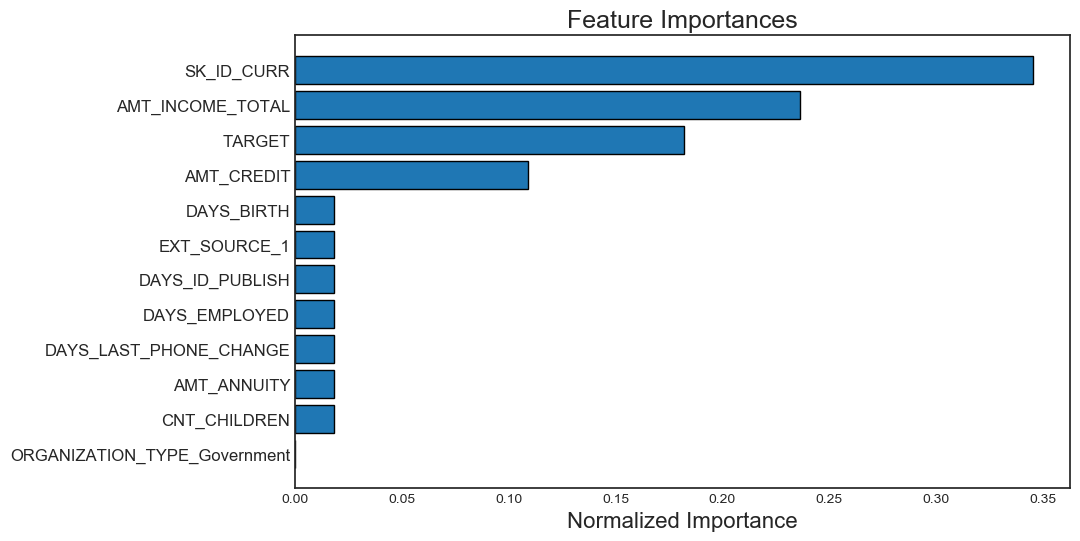

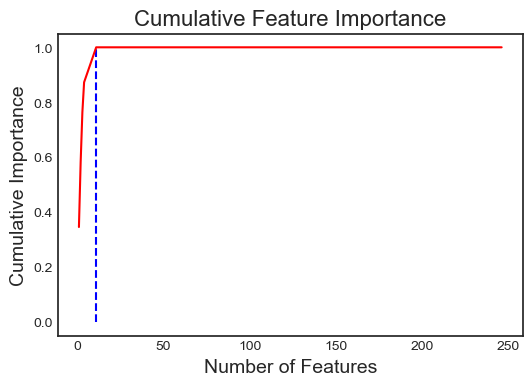

11 features required for 0.99 of cumulative importance


In [26]:
#plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [27]:
#内部实现借鉴了PCA的方法
fs.identify_low_importance(cumulative_importance = 0.99)

10 features required for cumulative importance of 0.99 after one hot encoding.
236 features do not contribute to cumulative importance of 0.99.



In [28]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,SK_ID_CURR,1.9,0.345455,0.345455
1,AMT_INCOME_TOTAL,1.3,0.236364,0.581818
2,TARGET,1.0,0.181818,0.763636
3,AMT_CREDIT,0.6,0.109091,0.872727
4,DAYS_BIRTH,0.1,0.018182,0.890909
5,EXT_SOURCE_1,0.1,0.018182,0.909091
6,DAYS_ID_PUBLISH,0.1,0.018182,0.927273
7,DAYS_EMPLOYED,0.1,0.018182,0.945455
8,DAYS_LAST_PHONE_CHANGE,0.1,0.018182,0.963636
9,AMT_ANNUITY,0.1,0.018182,0.981818


In [29]:
fs.identify_single_unique()

0 features with a single unique value.



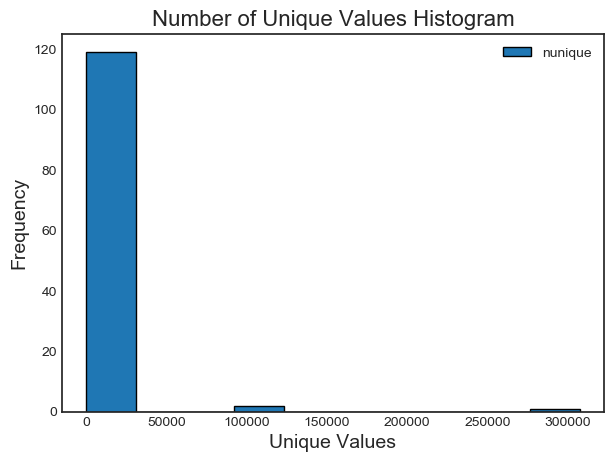

In [30]:
fs.plot_unique()

In [32]:
#Remove the features from all methods (return a df)
train_removed = fs.remove(methods = 'all', keep_one_hot = False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 237 features including one-hot features.


In [33]:
fs.identify_all(selection_params = {'missing_threshold':0.6,
                                   'correlation_threshold':0.98,
                                   'task':'classification',
                                   'eval_metric':'auc',
                                   'cumulative_importance':0.99})

17 features with greater than 0.60 missing values.

0 features with a single unique value.

20 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[